### 1. Invoke All Dependencies

In [1]:
import requests as req # for making get request into website
from bs4 import BeautifulSoup # for scrapping data from the website
import numpy as np # for ndarray manipulation
import pandas as pd # for dataframe manipulation

### 2. Get HTML Data

In [2]:
# request data from website
html = req.get("https://www.worldometers.info/coronavirus") 
# check downloaded content
print(html.content)

b'\n<!DOCTYPE html>\n<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->\n<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->\n<!--[if !IE]><!-->\n<html lang="en">\n<!--<![endif]-->\n\n\n\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n\n    <title>COVID - Coronavirus Statistics - Worldometer</title>\n    <meta name="description" content="Daily and weekly updated statistics tracking the number of COVID-19 cases, recovered, and deaths. Historical data with cumulative charts, graphs, and updates.">\n\n\n    \n\t<!-- Favicon -->\n\t<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">\n\t<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">\n\t<link rel="apple-touch-icon" sizes="60x60" href="/favicon/apple-icon-60x60.png">\n\t<link rel="apple-touch-icon" sizes="72x72" href="/favicon/apple-icon-72x72.png">\n\t<li

### 3. Parse HTML Tag Which is contain Required Data

In [3]:
# parsing HTML Tag usign BeautifulSoup
html_parsed = BeautifulSoup(html.content)

#search fo the required table
table = html_parsed.find("table", attrs={ "id": "main_table_countries_today"}) # parsed html tag based on id

#checking the result
print(table)

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br>Other</br></th>
<th width="20">Total<br>Cases</br></th>
<th width="30">New<br>Cases</br></th>
<th width="30">Total<br>Deaths</br></th>
<th width="30">New<br>Deaths</br></th>
<th width="30">Total<br>Recovered</br></th>
<th width="30">New<br>Recovered</br></th>
<th width="30">Active<br>Cases</br></th>
<th width="30">Serious,<br>Critical</br></th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="

In [4]:
# get all rows inside the table
rows = table.find_all("tr") # get every record data based on <tr>

print(rows[0]) # print first record data

<tr>
<th width="1%">#</th>
<th width="100">Country,<br>Other</br></th>
<th width="20">Total<br>Cases</br></th>
<th width="30">New<br>Cases</br></th>
<th width="30">Total<br>Deaths</br></th>
<th width="30">New<br>Deaths</br></th>
<th width="30">Total<br>Recovered</br></th>
<th width="30">New<br>Recovered</br></th>
<th width="30">Active<br>Cases</br></th>
<th width="30">Serious,<br>Critical</br></th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
<th width="30">New Cases/1M pop</th>
<th width="30">New Deaths/1M pop</th>
<th width="30">Active Cases/1M pop</th>
</tr>


In [5]:
rows[0].text.strip() # eliminate HTML tag, only get the value

'#\nCountry,Other\nTotalCases\nNewCases\nTotalDeaths\nNewDeaths\nTotalRecovered\nNewRecovered\nActiveCases\nSerious,Critical\nTot\xa0Cases/1M pop\nDeaths/1M pop\nTotalTests\nTests/\n1M pop\n\nPopulation\nContinent\n1 Caseevery X ppl1 Deathevery X ppl1 Testevery X ppl\nNew Cases/1M pop\nNew Deaths/1M pop\nActive Cases/1M pop'

In [7]:
def strip_split_record(row): # create function to strip and split record
    return row.text.strip().split("\n") # split every data column using spesific new line character

In [8]:
strip_split_record(rows[9]) # strip and split record index 9

['1',
 'USA',
 '107,718,064',
 '+2,414',
 '1,171,806                                ',
 '+3',
 '105,779,123',
 '+5,740',
 '767,135',
 '880',
 '321,733',
 '3,500',
 '1,181,255,176',
 '3,528,186',
 '334,805,269 ',
 'North America',
 '',
 '32860',
 '7',
 '0.01',
 '2,291']

### 4. Store Data into Dataframe

In [10]:
data = []
for row in rows:
    data.append(strip_split_record(row)[1:5]) # strip and split record then only get column contry,other untul TotalDeaths

In [28]:
df = pd.DataFrame(data) # store data list into DataFrame
df.head() # show five first record

,0,1,2,3
0,"Country,Other",TotalCases,NewCases,TotalDeaths
1,,"127,426,465","+2,536","1,641,469"
2,,"219,637,861",+47,"1,548,522"
3,,"249,768,472",+107,"2,069,062"
4,,"68,918,404",+67,"1,359,287"


In [29]:
df.head(10)

,0,1,2,3
0,"Country,Other",TotalCases,NewCases,TotalDeaths
1,,"127,426,465","+2,536","1,641,469"
2,,"219,637,861",+47,"1,548,522"
3,,"249,768,472",+107,"2,069,062"
4,,"68,918,404",+67,"1,359,287"
5,,"14,597,873",+53,"29,969"
6,,"12,836,449",,"258,823"
7,,15,,706
8,"693,186,245","+2,810","6,907,147",+9
9,USA,"107,718,064","+2,414","1,171,806"


In [30]:
'''
    Problem:
    1. first eight data have missing value in Country,Other Column
    2. Data number 9 (index-8) has invalid value in Country,Other Column
    3. There is no column name in dataframe

    SolutionL:
    1. Eliminate first nine data by only getting the next index-9 data
    2. Column name will contain the first row data
'''

df = pd.DataFrame(data[9:], columns=data[0]) 
df.head()

,"Country,Other",TotalCases,NewCases,TotalDeaths
0,USA,"107,718,064","+2,414","1,171,806"
1,India,"44,996,198",,"531,920"
2,France,"40,138,560",,"167,642"
3,Germany,"38,428,685",,"174,352"
4,Brazil,"37,739,057",,"704,897"


### 4. Visualize


In [48]:
df_plot = df[["Country,Other", "TotalCases"]] # only get two columns
df_plot = df_plot[:10]
df_plot.head()

,"Country,Other",TotalCases
0,USA,"107,718,064"
1,India,"44,996,198"
2,France,"40,138,560"
3,Germany,"38,428,685"
4,Brazil,"37,739,057"


In [49]:
# convert string into integer inside TotalCases Column

def string_obj_to_int(value): # make custom function to convert
    return int(value.replace(',', ''))


df_plot["TotalCases"] = df_plot["TotalCases"].apply(string_obj_to_int) # apply the function
df_plot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country,Other  10 non-null     object
 1   TotalCases     10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes


<AxesSubplot:xlabel='Country,Other'>

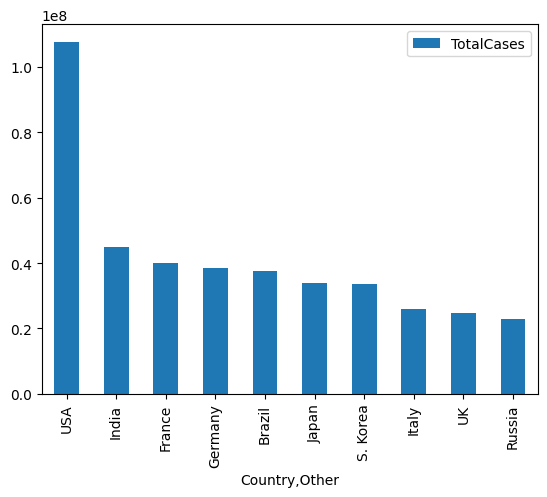

In [50]:
df_plot.plot(kind="bar", x="Country,Other", y="TotalCases") # plot using bar plot